**Color Histogram**

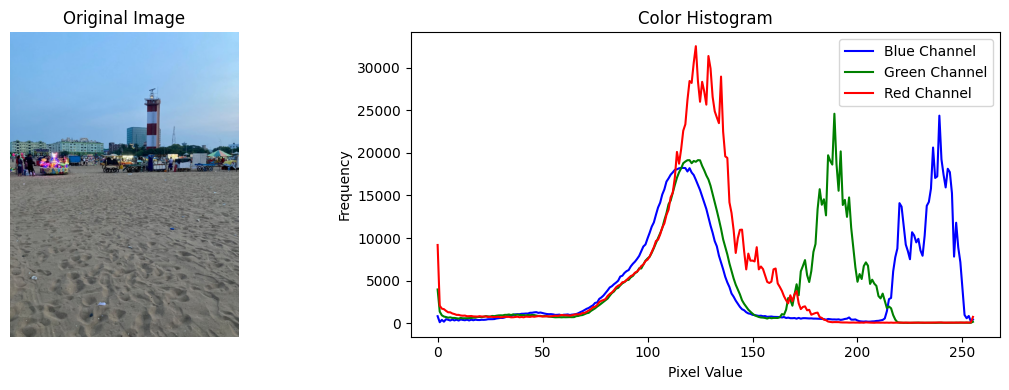

In [1]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('lighthouse.jpg')

# Convert the image from BGR to RGB (Matplotlib uses RGB)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Calculate the color histograms for each channel
hist_blue = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_green = cv2.calcHist([image], [1], None, [256], [0, 256])
hist_red = cv2.calcHist([image], [2], None, [256], [0, 256])

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(hist_blue, color='blue', label='Blue Channel')
plt.plot(hist_green, color='green', label='Green Channel')
plt.plot(hist_red, color='red', label='Red Channel')
plt.title('Color Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


**Gray Level Cooccurence Matrix - GLCM**

GLCM:
[[1.77897140e-03]
 [5.44433598e-04]
 [6.08723960e-04]
 [6.90104149e-04]
 [6.01399748e-04]
 [5.51757810e-04]
 [6.86848944e-04]
 [7.06380233e-04]
 [5.71289042e-04]
 [5.50944009e-04]
 [4.99674468e-04]
 [5.22460963e-04]
 [4.65494784e-04]
 [4.85839846e-04]
 [5.02115872e-04]
 [5.07812481e-04]
 [5.36295585e-04]
 [5.78613253e-04]
 [5.77799452e-04]
 [6.82779937e-04]
 [6.63248706e-04]
 [7.34049478e-04]
 [8.46354174e-04]
 [7.89388025e-04]
 [8.60188797e-04]
 [8.67513008e-04]
 [8.89485702e-04]
 [8.68326810e-04]
 [9.21223953e-04]
 [9.49707057e-04]
 [9.02506523e-04]
 [8.61816399e-04]
 [8.74023419e-04]
 [9.27734363e-04]
 [9.22851556e-04]
 [9.87955718e-04]
 [9.37499979e-04]
 [1.02294923e-03]
 [8.54492188e-04]
 [8.23567680e-04]
 [8.09733057e-04]
 [7.83691416e-04]
 [7.63346383e-04]
 [7.64973985e-04]
 [7.28352868e-04]
 [7.34863279e-04]
 [6.87662745e-04]
 [6.51855487e-04]
 [6.29068993e-04]
 [6.23372383e-04]
 [6.13606768e-04]
 [5.96516940e-04]
 [6.01399748e-04]
 [5.66406234e-04]
 [5.47688804e-04]
 [5.

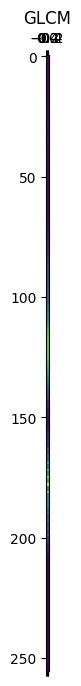

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_path = 'lighthouse.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Specify the distances and angles for GLCM computation
distances = [1, 2, 3]  # You can adjust these distances based on your requirements
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # You can adjust these angles based on your requirements

# Compute the GLCM
glcm = cv2.calcHist([image], [0], None, [256], [0, 256])

# Normalize the GLCM
glcm /= glcm.sum()

# Print the GLCM
print("GLCM:")
print(glcm)

# Visualize the GLCM (optional)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(np.log(1 + glcm), cmap='viridis')  # Display the log-transformed GLCM for better visualization
plt.title('GLCM')
plt.show()


**Histogram of Gradients - HOG**

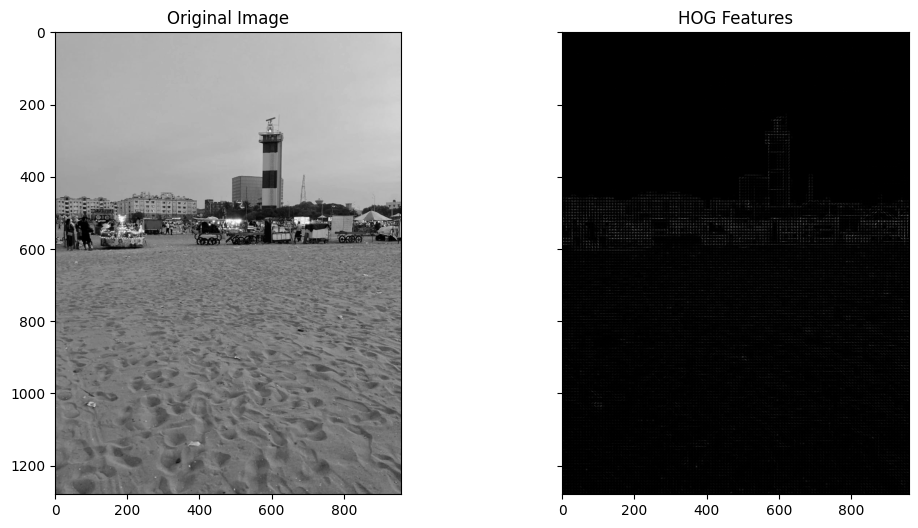

In [3]:
import numpy as np
from skimage import exposure, feature
from skimage import io, color
import matplotlib.pyplot as plt

image_path = 'lighthouse.jpg'
image = io.imread(image_path)

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Compute the HOG features
hog_features, hog_image = feature.hog(gray_image, visualize=True, block_norm='L2-Hys')

# Rescale the image for better visualization
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Visualize the original image and HOG features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.imshow(gray_image, cmap=plt.cm.gray)
ax1.set_title('Original Image')

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('HOG Features')

plt.show()


**Local Binary Pattern - LBP**

c:\Users\jothi\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


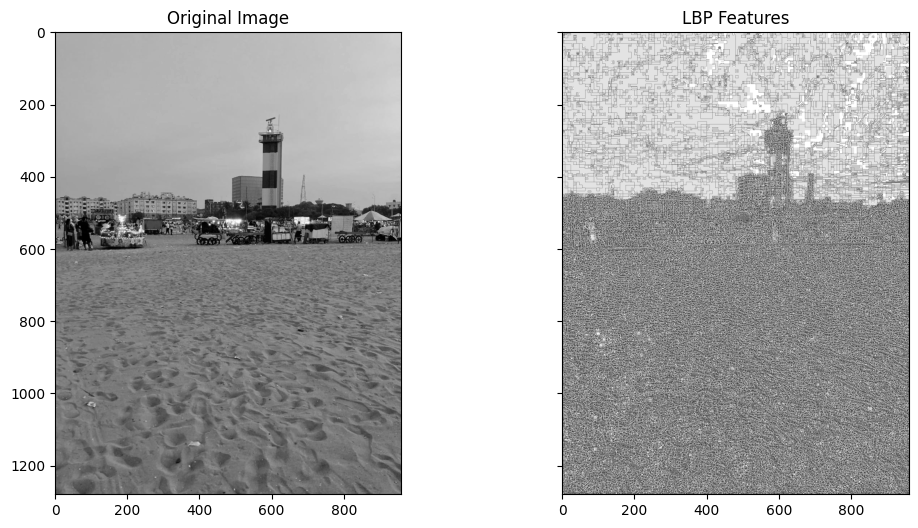

In [4]:
import numpy as np
from skimage import io, color, feature
import matplotlib.pyplot as plt

image_path = 'lighthouse.jpg'
image = io.imread(image_path)

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Set LBP parameters
radius = 1
n_points = 8 * radius

# Compute the LBP features
lbp = feature.local_binary_pattern(gray_image, n_points, radius, method='uniform')

# Calculate the histogram of LBP features
hist, _ = np.histogram(lbp, bins=np.arange(0, n_points + 3), range=(0, n_points + 2))

# Normalize the histogram
hist = hist.astype("float")
hist /= (hist.sum() + 1e-7)

#Visualize the LBP

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.imshow(gray_image, cmap=plt.cm.gray)
ax1.set_title('Original Image')

ax2.imshow(lbp, cmap='gray')
ax2.set_title('LBP Features')

plt.show()


**Gabor Filters**

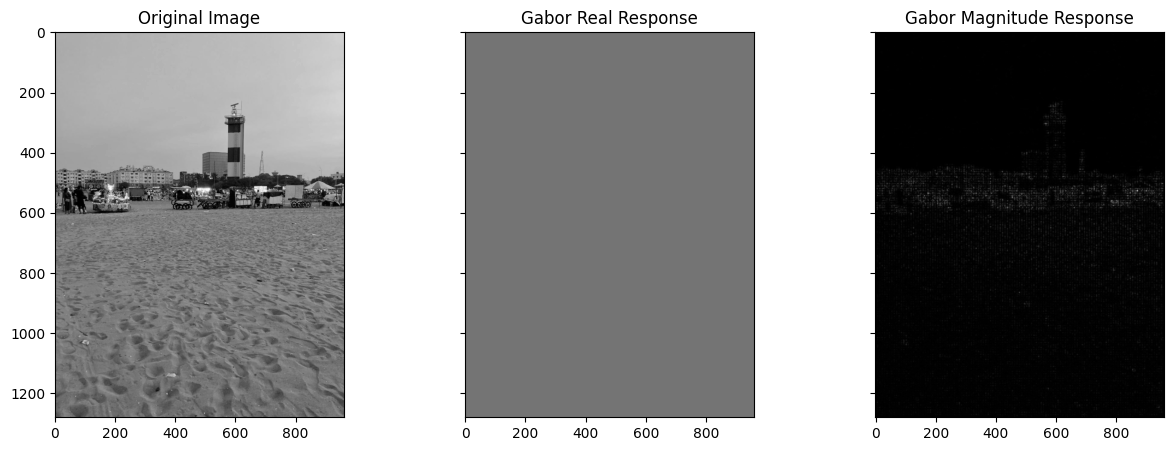

In [5]:
import numpy as np
from skimage import io, color, filters
import matplotlib.pyplot as plt

image_path = 'lighthouse.jpg'
image = io.imread(image_path)

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Set Gabor filter parameters
frequency = 0.6
theta = np.pi / 4  # Orientation of the Gabor filter
sigma = 1.5
n_stds = 3  # Number of standard deviations

# Apply the Gabor filter
gabor_response_real, gabor_response_imag = filters.gabor(gray_image, frequency, theta=theta, sigma_x=sigma, sigma_y=sigma, n_stds=n_stds)

# Compute the magnitude of the Gabor response
gabor_magnitude = np.sqrt(gabor_response_real**2 + gabor_response_imag**2)

# Display Gabor response
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

ax1.imshow(gray_image, cmap=plt.cm.gray)
ax1.set_title('Original Image')

ax2.imshow(gabor_response_real, cmap=plt.cm.gray)
ax2.set_title('Gabor Real Response')

ax3.imshow(gabor_magnitude, cmap=plt.cm.gray)
ax3.set_title('Gabor Magnitude Response')

plt.show()


**Scale-Invariant Feature Transform (SIFT)**

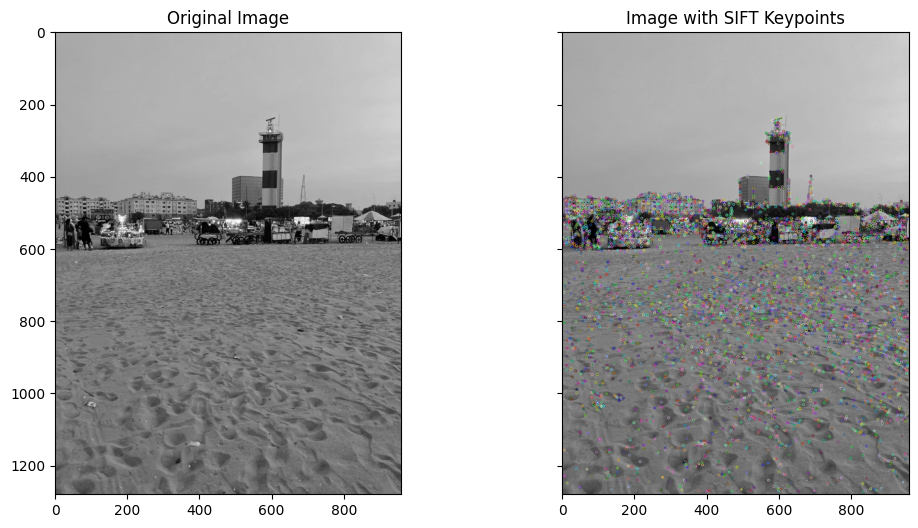

In [6]:
import cv2
import matplotlib.pyplot as plt

image_path = 'lighthouse.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Create a SIFT object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the original image and the image with keypoints
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original Image')

ax2.imshow(image_with_keypoints, cmap=plt.cm.gray)
ax2.set_title('Image with SIFT Keypoints')

plt.show()


**Speeded-Up Robust Features (SURF)**

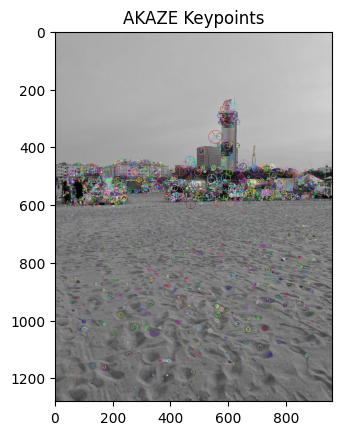

In [11]:
import cv2
import matplotlib.pyplot as plt

# Load an image
image_path = 'lighthouse.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Create an AKAZE object
akaze = cv2.AKAZE_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = akaze.detectAndCompute(image, None)

# Draw keypoints on the image
img_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Convert BGR image to RGB for Matplotlib
img_keypoints_rgb = cv2.cvtColor(img_keypoints, cv2.COLOR_BGR2RGB)

# Display the result using Matplotlib
plt.imshow(img_keypoints_rgb)
plt.title('AKAZE Keypoints')
plt.show()


**Corner Detection** 

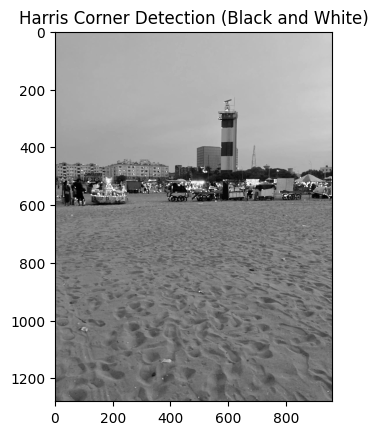

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image_path = 'lighthouse.jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect corners using Harris Corner Detection
dst = cv2.cornerHarris(gray_image, blockSize=2, ksize=3, k=0.04)

# Dilate the corner image to enhance corner points
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image.
threshold = 0.1 * dst.max()

# Create an RGB image copy to draw corners in black and white
image_with_corners_bw = np.copy(image)

# Draw corners in white on the black and white image
image_with_corners_bw[dst > threshold] = 255  # Draw corners in white (255 for a grayscale image)

# Convert the image to grayscale for display
image_with_corners_bw_gray = cv2.cvtColor(image_with_corners_bw, cv2.COLOR_BGR2GRAY)

# Display the result using Matplotlib
plt.imshow(image_with_corners_bw_gray, cmap='gray')
plt.title('Harris Corner Detection (Black and White)')
plt.show()


**PCA Analysis**

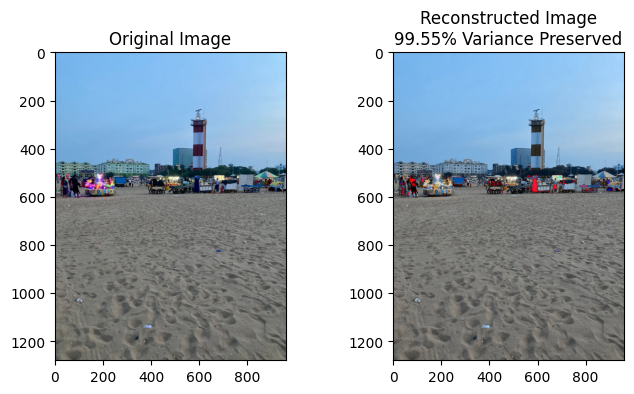

In [17]:
import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load a color image
image_path = 'lighthouse.jpg'
image = cv2.imread(image_path)

# Reshape the image to a 2D array
image_flattened = image.reshape((-1, 3))

# Apply PCA
n_components = 2  # Set the number of principal components
pca = PCA(n_components=n_components)
image_pca = pca.fit_transform(image_flattened)

# Reconstruct the image using the principal components
image_reconstructed = pca.inverse_transform(image_pca)

# Reshape the reconstructed image to its original shape
image_reconstructed = image_reconstructed.reshape(image.shape)

# Display the original and reconstructed images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(np.uint8(image_reconstructed), cv2.COLOR_BGR2RGB))
plt.title(f'Reconstructed Image\n{round(100 * sum(pca.explained_variance_ratio_), 2)}% Variance Preserved')

plt.show()
